# Parents: The Key to Student Academic Success
## by Scott Haluck

## Investigation Overview

Parents control much of a student's life, but how much do they contribute to student academic success? This investigation demonstrates that a range of parental decisions contribute significantly to student academic performance.

## Dataset Overview

The Programme for International Student Assessment (PISA) 2012 study gathered data about student performance, student life, and school quality from 65 countries. Containing data for over 400,000 students, the data is expansive in both breadth and depth, so it can be analyzed from a variety of perspectives.

[PISA Source Data](https://www.google.com/url?q=https://s3.amazonaws.com/udacity-hosted-downloads/ud507/pisa2012.csv.zip&sa=D&ust=1554482573645000)

[PISA Technical Manual](https://www.oecd.org/pisa/pisaproducts/PISA%202012%20Technical%20Report_Chapter%2016.pdf)

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [5]:
# load in the dataset into a pandas dataframe
pisa_data = pd.read_csv('pisa_summ.csv', low_memory=False)

# organize the levels of parent education in ordered data
levels = ['None', 'ISCED 1', 'ISCED 2', 'ISCED 3B, C', 'ISCED 3A, ISCED 4', 'ISCED 5B', 'ISCED 5A, 6']
edu_levels = pd.api.types.CategoricalDtype(ordered=True, categories = levels)
pisa_data['parent_edu'] = pisa_data['parent_edu'].astype(edu_levels)
pisa_data['father_edu'] = pisa_data['father_edu'].astype(edu_levels)
pisa_data['mother_edu'] = pisa_data['mother_edu'].astype(edu_levels)

# create a categorical with ordinal values for the student experience with preschool
levels = ['No  ', 'Yes, for one year or less ', 'Yes, for more than one year']
preschool_levels = pd.api.types.CategoricalDtype(ordered=True, categories = levels)
pisa_data['preschool'] = pisa_data['preschool'].astype(preschool_levels)

# create a categorical variable with ordinal values according to the context of beginning language
levels = ['0 to 3 years', '4 to 6 years','7 to 9 years', '10 to 12 years', '13 years or older']
lang_age = pd.api.types.CategoricalDtype(ordered=True, categories = levels)
pisa_data['age_lang_start'] = pisa_data['age_lang_start'].astype(lang_age)



> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## The parent's effect starts early, before the child is born: Parental education has a  positive relationship with student academic success.

## Parents: Maximize your education to enhance your children's.

Level of parental education is related to increased academic performance. Level of parental education also increases the relationship between family social status and academic performance.

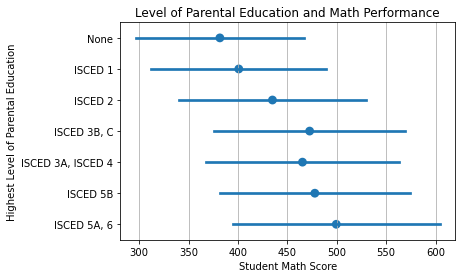

In [7]:
plt.grid(True)
sb.pointplot(data = pisa_data, y = 'parent_edu', x = 'math_score', ci = 'sd', linestyles = "");
plt.xlabel('Student Math Score');
plt.ylabel('Highest Level of Parental Education');
plt.title('Level of Parental Education and Math Performance');

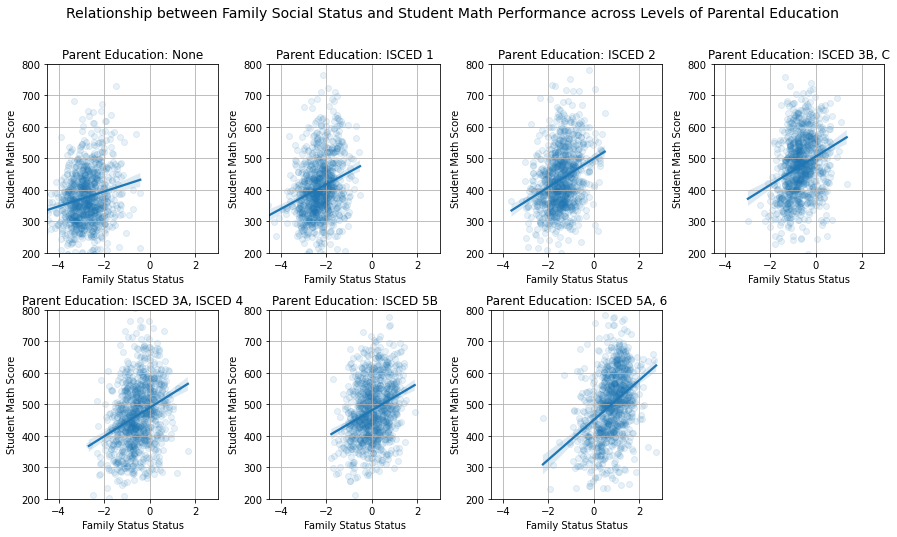

In [50]:
plt.figure(figsize = (15, 8));

# counter variable for proper subplot placement
i = 0;

# loop through each level of parental education from least to most
for _ in pisa_data.parent_edu.unique().sort_values():
    # if the level of parental education is given, then plot the graph
    if _ == _:
        plt.subplot(2,4,i+1)
        # label the graph with the appropriate level of education
        plt.title('Parent Education: {}'.format(_));
        # for consistent comparison, take a sample of 1000 from that level of parental education
        sub_data = pisa_data[pisa_data['parent_edu'] == _].sample(1000)
        plt.grid(True)
        sb.regplot(data = sub_data, x = 'status_index', y = 'math_score', scatter_kws = {'alpha':0.1});
        plt.xlabel('Family Status Status')
        plt.ylabel('Student Math Score')
        plt.xlim(-4.5,3);
        plt.ylim(200,800);
        i += 1;
plt.subplots_adjust(wspace = 0.3, hspace = 0.3);
plt.suptitle('Relationship between Family Social Status and Student Math Performance across Levels of Parental Education', fontsize = 14);

## It continues into the professional world: Parental occupation is linked to gains in family social status, which is linked to higher academic performance.

## Parents: Maximize your occupation to help your children.

For all levels of parental education, there remains a positive correlation between parental occupation and family social status. The increase in family social status is also related to increase academic performance. 

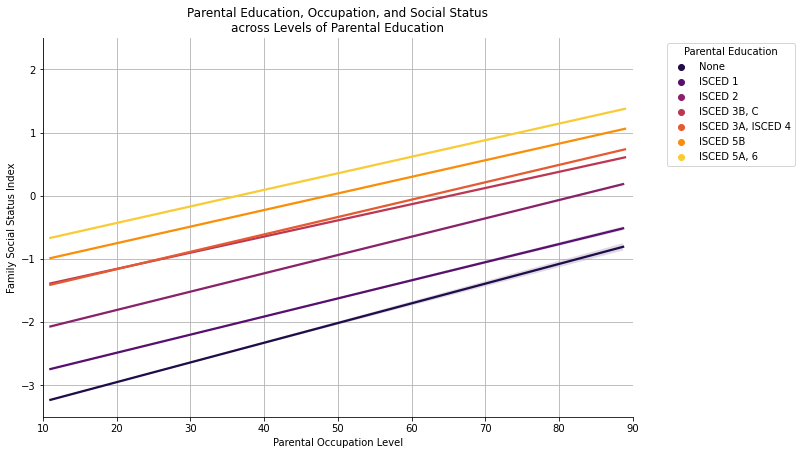

In [26]:
# plot the relationship for parental occupation and family social status across all levels of parental education
g = sb.FacetGrid(data = pisa_data, hue = 'parent_edu', palette = 'inferno', height = 6, aspect = 1.5);

# individual points will not be plotted to keep the graph simple and easy to read
g.map(sb.regplot, 'parent_occ', 'status_index', scatter_kws = {'alpha': 0});

# make the colors visible in the key so that the levels of parental education are clear
leg = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title = "Parental Education");
for lh in leg.legendHandles: 
    lh.set_alpha(1)

plt.grid(True)
plt.ylim(-3.5, 2.5)
plt.xlim(10,90)
plt.ylabel('Family Social Status Index');
plt.xlabel('Parental Occupation Level');
plt.title('Parental Education, Occupation, and Social Status\nacross Levels of Parental Education');

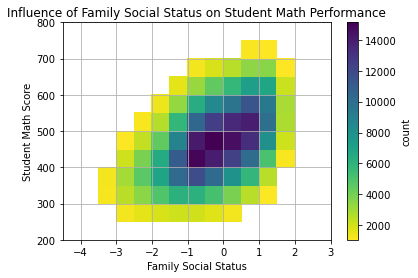

In [25]:
# establish bin structure for standardized score of social status and student confidence
std_bins = np.arange(-4.5,3.5,0.5)
# establish bin structure for academic scores
score_bins = np.arange(200,850,50)

# plot density of family social status and math score
plt.hist2d(data = pisa_data, x = 'status_index', y = 'math_score', bins = [std_bins, score_bins], cmin = 1000, cmap = 'viridis_r')
plt.colorbar(label = 'count')
plt.grid(True)
plt.xlabel('Family Social Status')
plt.ylabel('Student Math Score');
plt.title('Influence of Family Social Status on Student Math Performance');

## Once the child arrives, start early: Preschool is a great investment in your child's future, regardless of the new cultures and languages that future emigration may bring.

## Parents: Start your children's education early.

Experience in preschool offers an advantage for future academic performance. The advantage is most significant when students begin learning their new language after the age of 13 (likely due to an emigration to a new culture).

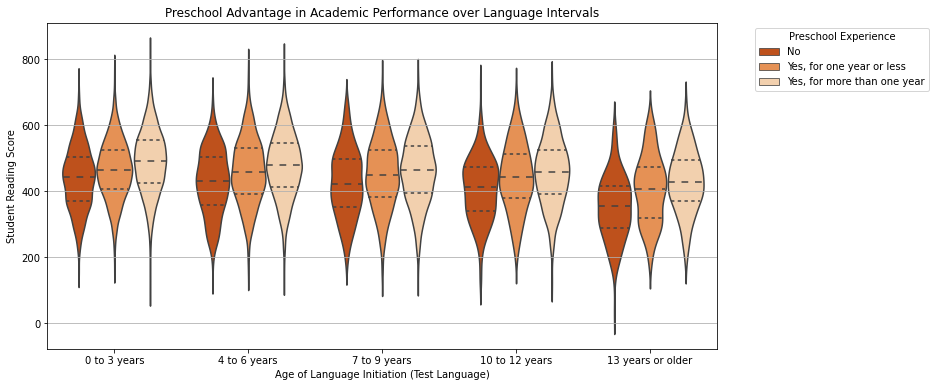

In [27]:
plt.figure(figsize=(12,6))

# analyze preschool experience, age of language initiation, and reading performance
plt.grid(True)
sb.violinplot(data = pisa_data, y = 'read_score', x = 'age_lang_start', hue = 'preschool', scale = 'area', inner = 'quartile', palette = 'Oranges_r');
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title= "Preschool Experience");
plt.ylabel('Student Reading Score');
plt.xlabel('Age of Language Initiation (Test Language)');
plt.title('Preschool Advantage in Academic Performance over Language Intervals');

## Hold on till the end: Students with a parent in the home enjoy a stronger relationship between family social status and academic benefit.

## Parents: Stay with your children to support their academic success.

Students with a parent in the home receive almost twice academic benefit from increased family social status as those without a parent.

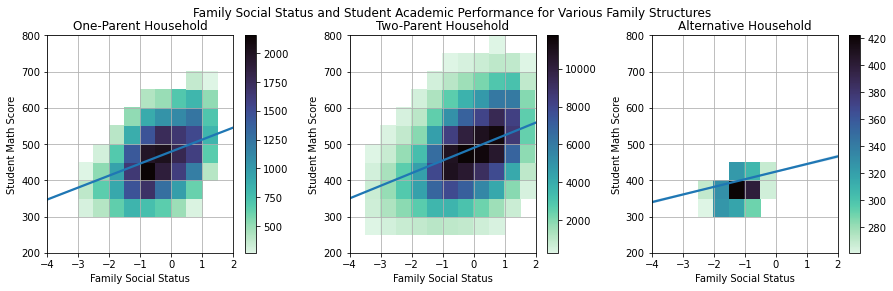

In [32]:
# descriptive titles for the different family structures in the survey
households = ['One-Parent', 'Two-Parent', 'Alternative']
plt.figure(figsize = (15, 4));

# counter variable for proper subplot placement
i = 0;

# loop through the three different family structures
for _ in pisa_data.fam_struct.value_counts().index.sort_values():
    plt.subplot(1,3,i+1)
    plt.grid(True)
    # title each graph appropriately
    plt.title('{} Household'.format(households[int(_)-1]));
    # collect the appropriate data for the current family structure
    sub_data = pisa_data[pisa_data['fam_struct'] == _]
    # plot a 2-dimension histogram (heatmap) of family social status and math score
    plt.hist2d(data = sub_data, x = 'status_index', y = 'math_score', bins = [std_bins, score_bins], cmin = 250, cmap = 'mako_r');
    # plot a least-squares regression line to further illustrate the relationship
    sb.regplot(data = sub_data, x = 'status_index', y = 'math_score', scatter_kws = {'alpha':0})
    plt.grid(True);
    plt.xlim(-4,2);
    plt.ylim(200,800);
    plt.xlabel('Family Social Status');
    plt.ylabel('Student Math Score');
    plt.colorbar();
    i += 1;
plt.subplots_adjust(wspace = 0.3);
plt.suptitle('Family Social Status and Student Academic Performance for Various Family Structures\n');

## Looking to have an extreme impact? It may require a move: The quality of academic performance in some countries is considerably lower than social status would predict. 

## Parents: Make sure the education in your country is protecting your investment.

### This analysis required calculating an additional variable, performance index, comparing how a country's average academic performance percentile compares to its average social status percentile.

Despite a general, global relationship between family social status and academic performance, some countries provide an education that offers more advantages than others. All countries show a similar relationship between family social status and academic performance, but the top 10 countries demonstrate an advantage of approximately 100 points over the lowest 10 countries.

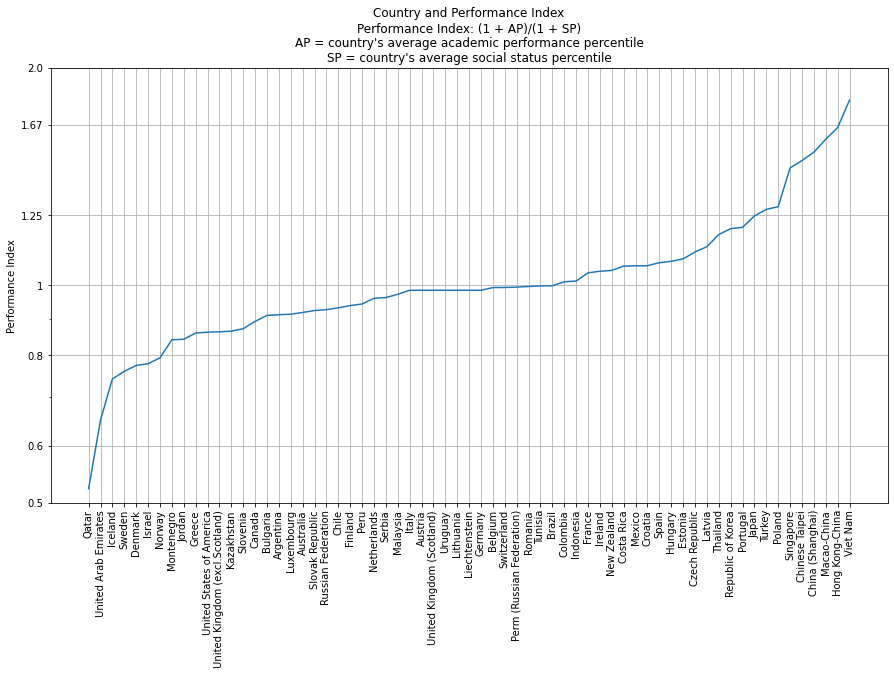

In [52]:
# calculate an academic average for each student
pisa_data['academic_avg'] = (pisa_data.math_score + pisa_data.read_score + pisa_data.science_score)/3

# produce a subset of the dataframe that organizes the average information by country
pisa_country_data = pisa_data.groupby('country').mean()

# calculate performance index as described above
pisa_country_data['performance'] = (1+pisa_country_data.academic_avg.rank(pct = True)) / (1+pisa_country_data.status_index.rank(pct = True))

# gather the countries and their respective performance indices
countries = pisa_country_data.performance.sort_values().dropna().index
perform = pisa_country_data.performance.sort_values().dropna().values
plt.figure(figsize = (15, 8));
plt.grid(True)

# plot each country and its performance index to show the distribution across all countries
plt.plot(countries, perform);
plt.title('Country and Performance Index\nPerformance Index: (1 + AP)/(1 + SP)\nAP = country\'s average academic performance percentile\nSP = country\'s average social status percentile')
plt.yscale('log');
plt.yticks([]);
plt.ylim(.5, 2)
plt.ylabel('Performance Index')
ax = plt.gca();
ax.axes.yaxis.set_ticks([.5, .6, 0.8, 1, 1.25, 1.67, 2.0]);
ax.axes.set_yticklabels([.5, .6, 0.8, 1, 1.25, 1.67, 2.0]);
plt.xticks(rotation=90);

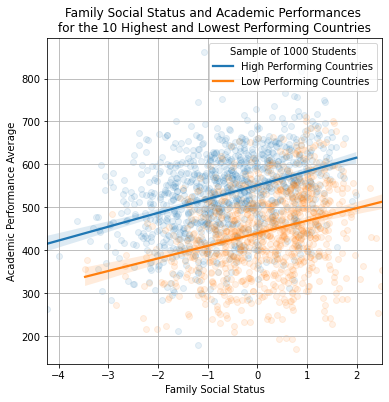

In [46]:
# gather the list of the top 10 countries according to performance index
upper_countries = pisa_country_data.performance.sort_values(ascending = False).dropna().head(10).index

# gather the list of the bottom 10 countries according to performance index
lower_countries = pisa_country_data.performance.sort_values(ascending = True).dropna().head(10).index

plt.figure(figsize = (6, 6))
# sample 1000 students from high performing countries, plot a linear regression of family social status and academic performance
sb.regplot(data = pisa_data[pisa_data['country'].isin(upper_countries)].sample(1000), x = 'status_index', y = 'academic_avg', scatter_kws = {'alpha':0.1});
# sample 1000 students from low performing countries, plot a linear regression of family social status and academic performance
sb.regplot(data = pisa_data[pisa_data['country'].isin(lower_countries)].sample(1000), x = 'status_index', y = 'academic_avg', scatter_kws = {'alpha':0.1});
plt.grid(True)
plt.legend(['High Performing Countries','Low Performing Countries'], title = 'Sample of 1000 Students');
plt.title('Family Social Status and Academic Performances \nfor the 10 Highest and Lowest Performing Countries');
plt.xlabel('Family Social Status');
plt.ylabel('Academic Performance Average');